In [27]:
from typing import TypedDict,Literal

In [28]:
class PortfolioState(TypedDict):
    amount_usd:float
    total_usd:float
    total:float
    target_currency :Literal["INR","EUR"]

In [29]:
def calc(state:PortfolioState) -> PortfolioState:
    state['total_usd'] = state['amount_usd'] * 1.08
    return state

def convert_to_inr(state:PortfolioState) -> PortfolioState:
    state['total'] = state['total_usd'] * 85
    return  state

def convert_to_eur(state:PortfolioState) -> PortfolioState:
    state['total'] = state['total_usd'] * 0.9
    return state

def choose_currency(state:PortfolioState) -> PortfolioState:
    return state['target_currency']


In [30]:
from langgraph.graph import StateGraph,START,END

builder = StateGraph(PortfolioState)

builder.add_node('CALC_TOTAL',calc)
builder.add_node('CONVERT_TO_INR',convert_to_inr)
builder.add_node('CONVERT_TO_EUR',convert_to_eur)

builder.add_edge(START,'CALC_TOTAL')
builder.add_conditional_edges('CALC_TOTAL',choose_currency,{
    'INR': 'CONVERT_TO_INR',
    'EUR': 'CONVERT_TO_EUR',
})
builder.add_edge('CONVERT_TO_INR',END)
builder.add_edge('CONVERT_TO_EUR',END)

graph = builder.compile()


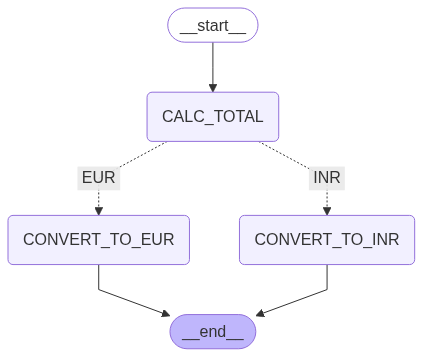

In [31]:
from IPython.display import Image,display
display(Image(graph.get_graph().draw_mermaid_png()))

In [33]:
user_input_usd = float(input("Enter The US Dollar Amount: "))
user_input = input("Enter a Currency Which You Want To Convert?\nINR/EUR: ")
print(user_input.upper())
graph.invoke({'amount_usd':user_input_usd,'target_currency':user_input.upper()})

EUR


{'amount_usd': 50.0,
 'total_usd': 54.0,
 'total': 48.6,
 'target_currency': 'EUR'}